## Import Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,Normalizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.metrics import roc_curve, auc

from prettytable import PrettyTable

import seaborn as sns


Data Read

In [2]:
# Reads the data into a pandas dataframe
df = pd.read_csv('CW1_data_202223.csv')

df.head(5)

,id,Gender,Age,HasDrivingLicense,RegionID,Switch,VehicleAge,PastAccident,AnnualPremium,SalesChannelID,DaysSinceCreated,Result
0,332804,Female,39.0,1.0,15.0,0.0,1-2 Year,NaN,"£2,645.30",55,227,1
1,116249,Male,38.0,1.0,11.0,NaN,1-2 Year,NaN,"£1,151.90",26,29,0
2,255006,Male,22.0,1.0,30.0,NaN,< 1 Year,NaN,"£2,265.90",152,166,0
3,317475,Female,23.0,1.0,NaN,NaN,< 1 Year,NaN,"£1,456.60",151,277,0
4,344213,Male,56.0,1.0,48.0,0.0,> 2 Years,NaN,£131.50,154,155,0


In [3]:
# Dataset's number of rows and columns.
print('df shape:\n' , df.shape, '\n')

# Information of the dataset.
print('df info:\n' , df.info() , '\n')

# Dataset column names.
print('df columns:\n' , df.columns, '\n')

# Dataset unique values.

print('df unique values\n', df.nunique())

df shape:
 (304887, 12) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304887 entries, 0 to 304886
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 304887 non-null  int64  
 1   Gender             274460 non-null  object 
 2   Age                274339 non-null  float64
 3   HasDrivingLicense  274399 non-null  float64
 4   RegionID           274334 non-null  float64
 5   Switch             152557 non-null  float64
 6   VehicleAge         274446 non-null  object 
 7   PastAccident       152422 non-null  object 
 8   AnnualPremium      304887 non-null  object 
 9   SalesChannelID     304887 non-null  int64  
 10  DaysSinceCreated   304887 non-null  int64  
 11  Result             304887 non-null  int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 27.9+ MB
df info:
 None 

df columns:
 Index(['id', 'Gender', 'Age', 'HasDrivingLicense', 'RegionID', 'Switch',
       'Veh

In [4]:
# Numerical value statistics of the dataset.
print('df describe \n' , df.describe(include=['float64', 'int64']), '\n')

df describe 
                   id            Age  HasDrivingLicense       RegionID  \
count  304887.000000  274339.000000      274399.000000  274334.000000   
mean   190594.098072      38.832561           0.997853      26.408892   
std    110022.144283      15.504062           0.046281      13.213345   
min         1.000000      20.000000           0.000000       0.000000   
25%     95342.500000      25.000000           1.000000      15.000000   
50%    190639.000000      36.000000           1.000000      28.000000   
75%    285785.500000      49.000000           1.000000      35.000000   
max    381109.000000      85.000000           1.000000      52.000000   

              Switch  SalesChannelID  DaysSinceCreated         Result  
count  152557.000000   304887.000000     304887.000000  304887.000000  
mean        0.458281      111.966591        154.272609       0.121970  
std         0.498258       54.230069         83.642389       0.327251  
min         0.000000        1.000000    

In [5]:
print(df.describe(include=[object]))

        Gender VehicleAge PastAccident AnnualPremium
count   274460     274446       152422        304887
unique       2          3            2         46328
top       Male   1-2 Year          Yes      £131.50 
freq    148391     144374        76976         51963


In [6]:

try:
  df.drop(['id', 'RegionID', 'SalesChannelID'], axis=1, inplace = True)
except KeyError:
  print('Attributes already removed')

print(df.head(10))

   Gender   Age  HasDrivingLicense  Switch VehicleAge PastAccident  \
0  Female  39.0                1.0     0.0   1-2 Year          NaN   
1    Male  38.0                1.0     NaN   1-2 Year          NaN   
2    Male  22.0                1.0     NaN   < 1 Year          NaN   
3  Female  23.0                1.0     NaN   < 1 Year          NaN   
4    Male  56.0                1.0     0.0  > 2 Years          NaN   
5    Male  30.0                1.0     NaN        NaN          NaN   
6     NaN  48.0                1.0     0.0   1-2 Year          Yes   
7    Male  20.0                1.0     0.0   < 1 Year          Yes   
8  Female  23.0                1.0     0.0   < 1 Year           No   
9     NaN  77.0                1.0     1.0   1-2 Year           No   

  AnnualPremium  DaysSinceCreated  Result  
0    £2,645.30                227       1  
1    £1,151.90                 29       0  
2    £2,265.90                166       0  
3    £1,456.60                277       0  
4      £1

DEALING WITH MISSING VALUES

---

In [7]:
# Check if the dataset contains missing values
print(df.isna().sum(), '\n')

Gender                30427
Age                   30548
HasDrivingLicense     30488
Switch               152330
VehicleAge            30441
PastAccident         152465
AnnualPremium             0
DaysSinceCreated          0
Result                    0
dtype: int64 



Text(-67.33528645833334, 0.5, 'Columns')

<Figure size 792x432 with 0 Axes>

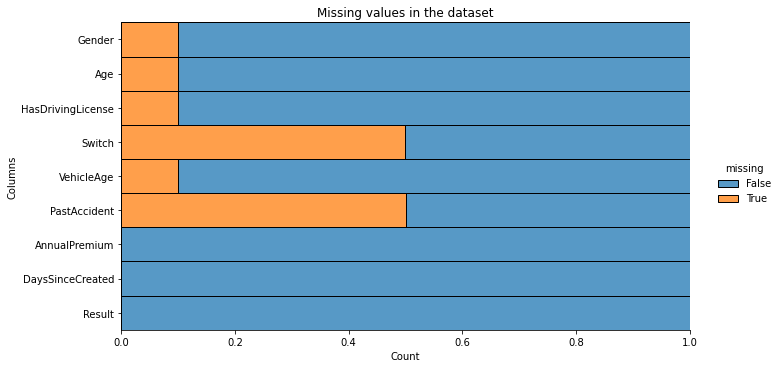

In [8]:
plt.figure(figsize=(11,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=2   
)

plt.title("Missing values in the dataset")
plt.xlabel("Count")
plt.ylabel("Columns") 


Dealing with missing values of Numerical Features

---

In [9]:
# Age
# Fill missing values with median
df['Age'].fillna(df['Age'].median(), inplace=True)
print(f"Median Age value of the dataset is {df['Age'].median()}")
df.Age = df.Age.astype('int64')

# AnnualPremium
df['AnnualPremium']=(df['AnnualPremium'].replace( '[\£,)]','', regex=True))
df['AnnualPremium'].fillna(df['AnnualPremium'].median(), inplace=True)
df.AnnualPremium = df.AnnualPremium.astype(float)

# HasDrivingLicense
df['HasDrivingLicense'].fillna(df['HasDrivingLicense'].median(), inplace=True)
df.HasDrivingLicense = df.HasDrivingLicense.astype('int64')

# Switch
df['Switch'].fillna(df['Switch'].median(), inplace=True)
df.Switch = df.Switch.astype('int64')

#VehicleAge

# DaySinceCreated
    #no missing values
print(df.isna().sum())

Median Age value of the dataset is 36.0
Gender                30427
Age                       0
HasDrivingLicense         0
Switch                    0
VehicleAge            30441
PastAccident         152465
AnnualPremium             0
DaysSinceCreated          0
Result                    0
dtype: int64


Dealing with missing values of Categorical Features

---

In [10]:
imp_mf = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# Gender
df.Gender = imp_mf.fit_transform(df['Gender'].values.reshape(-1,1))[:,0]

# HasDrivingLicense
df['HasDrivingLicense']=(df['HasDrivingLicense'].replace(0, 'No'))
df['HasDrivingLicense']=(df['HasDrivingLicense'].replace(1, 'Yes'))
df.HasDrivingLicense = imp_mf.fit_transform(df['HasDrivingLicense'].values.reshape(-1,1))[:,0]
#df.HasDrivingLicense = imp_mf.fit_transform(df['HasDrivingLicense'].values.reshape(-1,1))[:,0]

# Switch
df['Switch']=(df['Switch'].replace(0, 'No'))
df['Switch']=(df['Switch'].replace(1, 'Yes'))
df.Switch = imp_mf.fit_transform(df['Switch'].values.reshape(-1,1))[:,0]

# VehicleAge
df.VehicleAge = imp_mf.fit_transform(df['VehicleAge'].values.reshape(-1,1))[:,0]

# PastAccident
df.PastAccident = imp_mf.fit_transform(df['PastAccident'].values.reshape(-1,1))[:,0]

In [11]:
print('After filling missing values\n', df.isna().sum())

df.head(10)

After filling missing values
 Gender               0
Age                  0
HasDrivingLicense    0
Switch               0
VehicleAge           0
PastAccident         0
AnnualPremium        0
DaysSinceCreated     0
Result               0
dtype: int64


,Gender,Age,HasDrivingLicense,Switch,VehicleAge,PastAccident,AnnualPremium,DaysSinceCreated,Result
0,Female,39,Yes,No,1-2 Year,Yes,2645.30,227,1
1,Male,38,Yes,No,1-2 Year,Yes,1151.90,29,0
2,Male,22,Yes,No,< 1 Year,Yes,2265.90,166,0
3,Female,23,Yes,No,< 1 Year,Yes,1456.60,277,0
4,Male,56,Yes,No,> 2 Years,Yes,131.50,155,0
5,Male,30,Yes,No,1-2 Year,Yes,1755.90,92,0
6,Male,48,Yes,No,1-2 Year,Yes,2517.05,188,0
7,Male,20,Yes,No,< 1 Year,Yes,2365.30,220,0
8,Female,23,Yes,No,< 1 Year,No,131.50,163,0
9,Male,77,Yes,Yes,1-2 Year,No,131.50,283,0


## Data Exploration / Data Inspection

In [12]:
categorical_features = ['Gender', 'HasDrivingLicense', 'Switch' , 'VehicleAge', 'PastAccident']

numerical_features = ['Age', 'AnnualPremium', 'DaysSinceCreated']


Cardinality in categorical columns

---

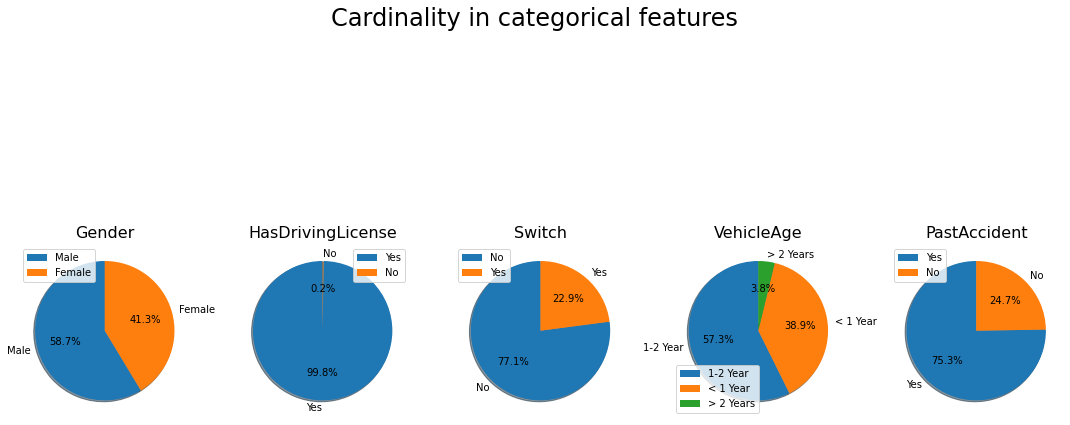

In [13]:
fig = plt.figure(figsize = (10,10))

axes = [category + "_ax" for category in df[categorical_features].columns]

for i in range(len(df[categorical_features].columns)):
      
    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    labels = df[categorical_features][df[categorical_features].columns[i]].value_counts().index
    sizes = df[categorical_features][df[categorical_features].columns[i]].value_counts().values
    #explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
    
    axes[i] = fig.add_subplot(round(len(df[categorical_features].columns)), 5,i+1)
    
    axes[i].pie(sizes, 
            #explode=explode, 
            labels=labels, 
            autopct='%1.1f%%',
            shadow=True, 
            startangle=90)
    
    fig.set_figheight(40)
    fig.set_figwidth(15)
    
    #ax1.legend(labels)
    axes[i].set_title(df[categorical_features].columns[i], fontsize = 16)
    axes[i].legend(loc="best")

fig.suptitle("Cardinality in categorical features", fontsize=24, y= 1)
fig.tight_layout()

plt.show()

Histogram

---

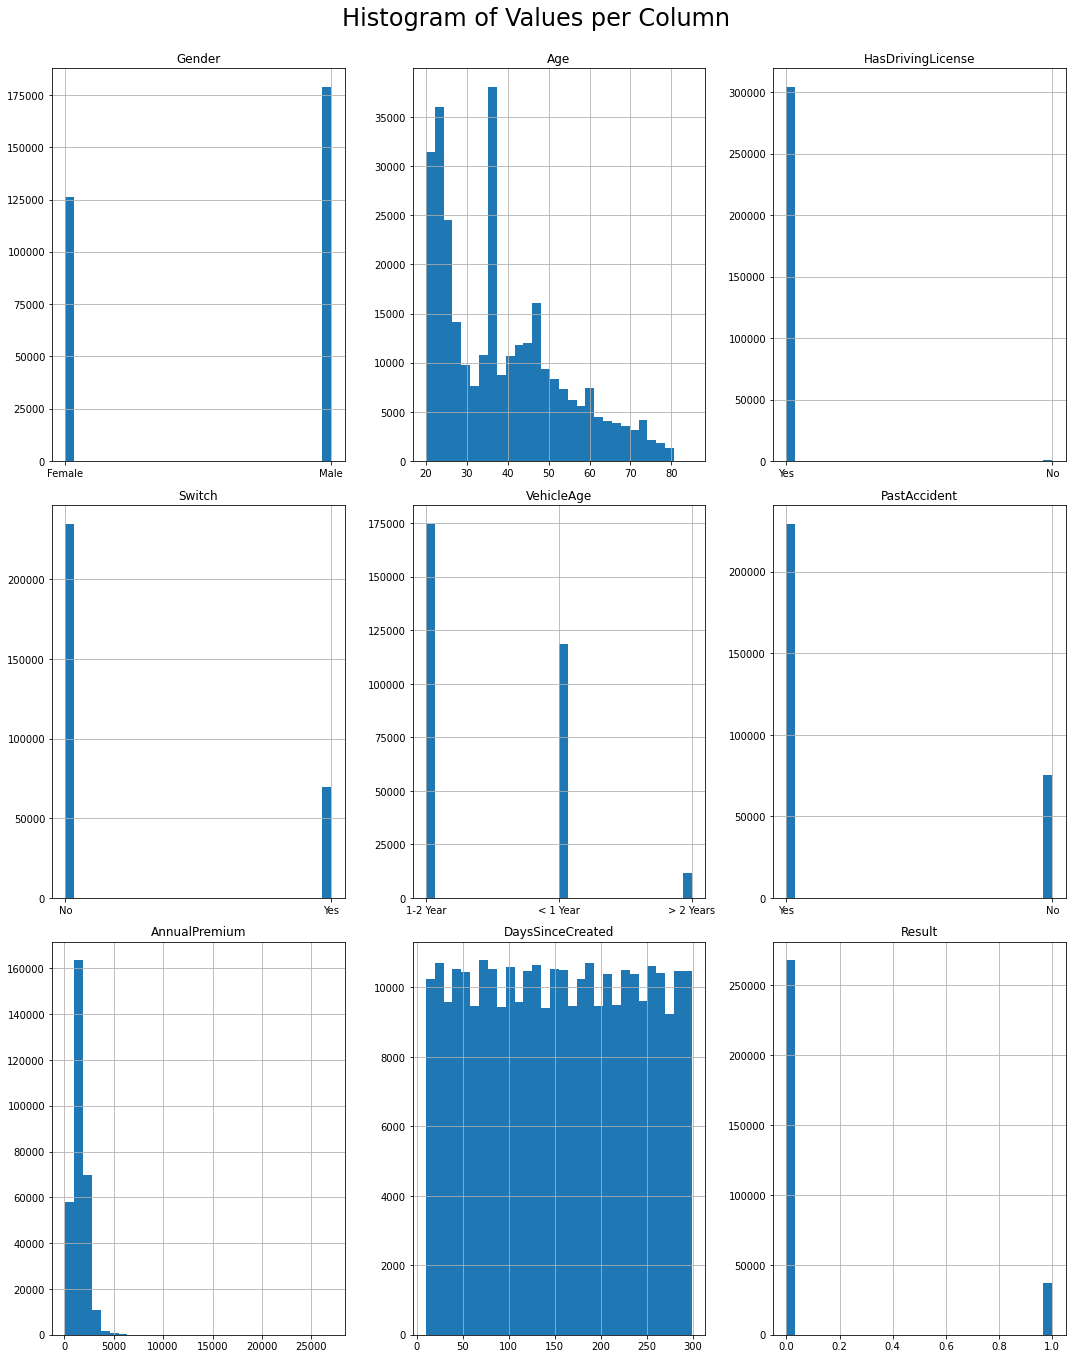

In [14]:
fig = plt.figure(figsize = (15,55))

for i in range(len(df.columns)):
      
    fig.add_subplot(round(len(df.columns)),3,i+1)
    plt.title(str(df.columns[i]))
    
    df[df.columns[i]].hist(bins=30)
        
            
fig.suptitle("Histogram of Values per Column", fontsize=24, y = 1)

plt.tight_layout()
plt.show()

Pairplot

---

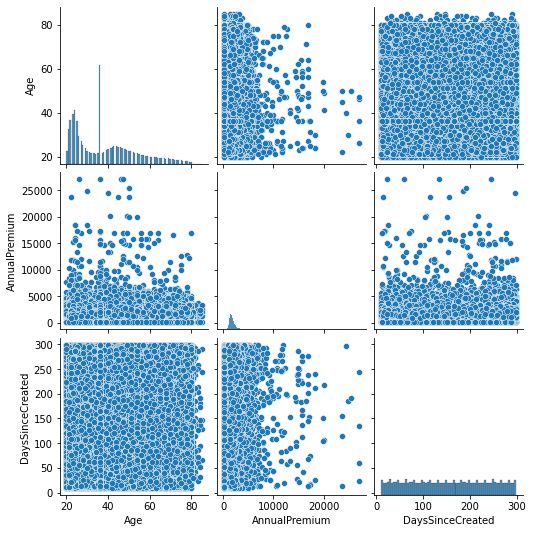

In [15]:
sns.pairplot(df[numerical_features])
plt.show()

Boxplot

---

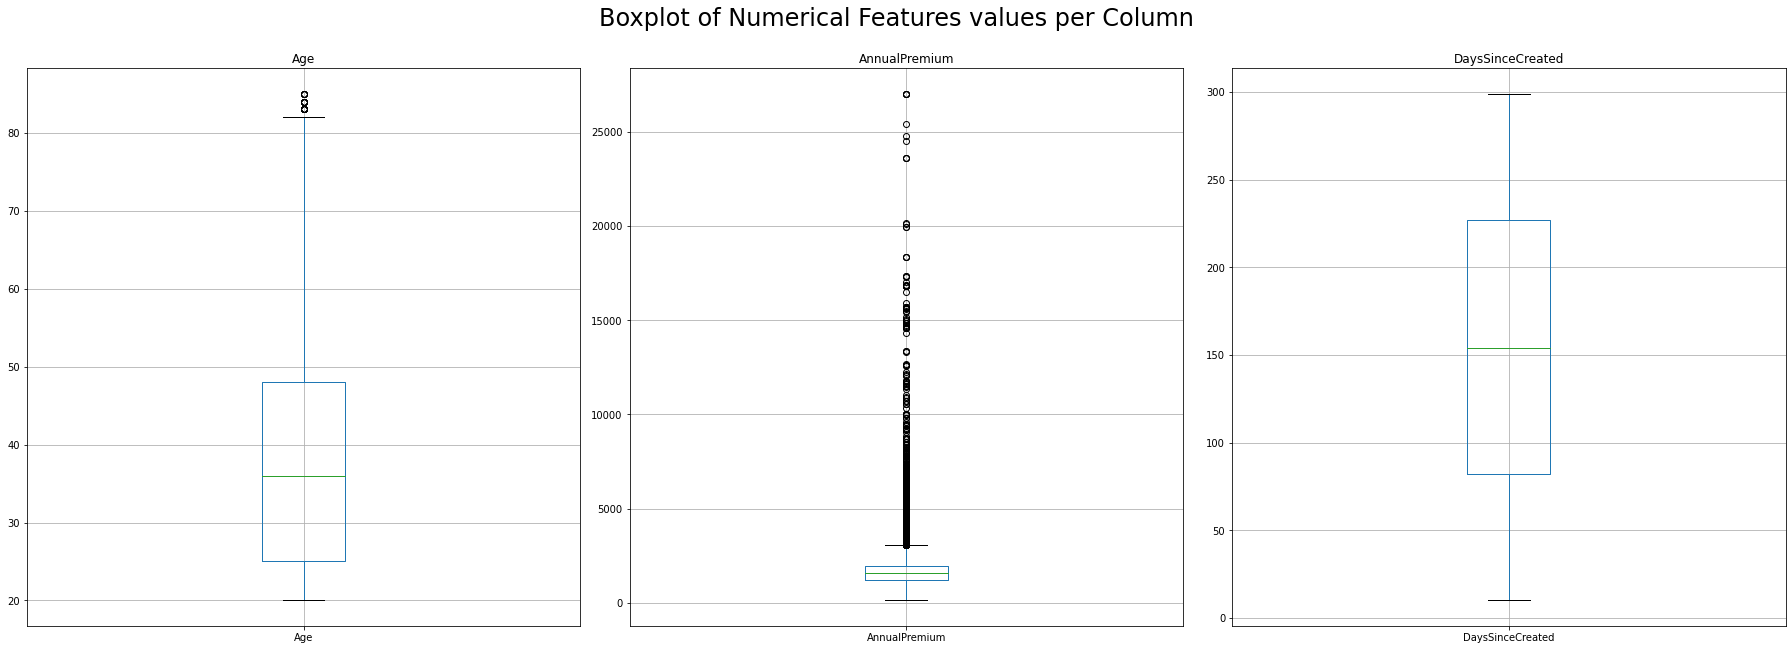

In [16]:
fig = plt.figure(figsize = (25,25))

fig.suptitle("Boxplot of Numerical Features values per Column", fontsize=24, y = 1)

for i in range(len(df[numerical_features].columns)):
     fig.add_subplot(round(len(df[numerical_features].columns)),3,i+1)
     plt.title(str(df[numerical_features].columns[i]))
     df[numerical_features].boxplot(column = df[numerical_features].columns[i])

plt.tight_layout()
plt.show()

Handling Outliers of the dataset

---

In [17]:
# Age 
i = 90
while i<=100:
  print("{} The obtained percentile value is {}".format(i, np.percentile(df['Age'], i)))
  i+=1  

90 The obtained percentile value is 61.0
91 The obtained percentile value is 62.0
92 The obtained percentile value is 63.0
93 The obtained percentile value is 65.0
94 The obtained percentile value is 66.0
95 The obtained percentile value is 68.0
96 The obtained percentile value is 70.0
97 The obtained percentile value is 72.0
98 The obtained percentile value is 74.0
99 The obtained percentile value is 77.0
100 The obtained percentile value is 85.0


In [18]:
#There are few values more than 77 and we will replace them with the median value
median = df['Age'].median()
df['Age'] = df['Age'].apply(lambda x : median if x>=77 else x)

In [19]:
# AnnualPremium
i = 90
while i<=100:
    print("{} The obtained percentile value is {}".format(i, np.percentile(df['AnnualPremium'], i)))
    i+=1

90 The obtained percentile value is 2422.3
91 The obtained percentile value is 2471.25
92 The obtained percentile value is 2525.506
93 The obtained percentile value is 2589.8
94 The obtained percentile value is 2666.2339999999967
95 The obtained percentile value is 2760.25
96 The obtained percentile value is 2880.95
97 The obtained percentile value is 3034.720999999999
98 The obtained percentile value is 3268.3279999999972
99 The obtained percentile value is 3645.2
100 The obtained percentile value is 27008.25


In [20]:
median = df['AnnualPremium'].median()
df['AnnualPremium'] = df['AnnualPremium'].apply(lambda x : median if x>=3645 else x)

Feature Correlation Map

---

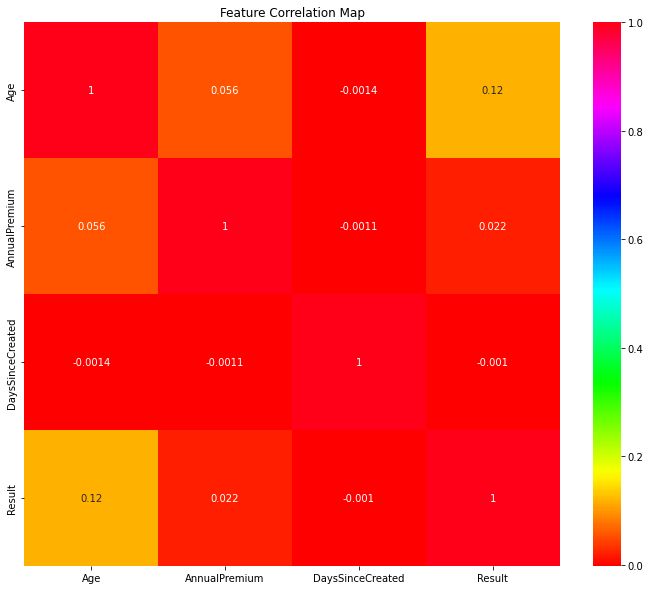

In [21]:
df['Result'] = np.where(df['Result']==True, 1, 0)
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='hsv')
plt.title("Feature Correlation Map")
plt.show()

Checking for Class Imbalance

---

There is a Class Imbalance in favour of Result's 0 of 87.8% to 12.2% 


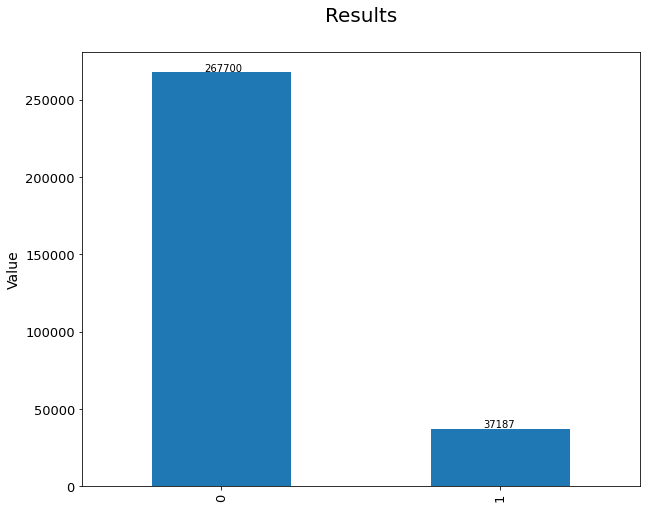

In [22]:
axis = df['Result'].value_counts().plot(kind='bar', figsize=(10, 8), fontsize=13)
axis.set_title('Results', size=20, pad=30)
axis.set_ylabel('Value', fontsize=14)

for i in axis.patches:
    axis.text(i.get_x() + 0.19, i.get_height() + 700, str(round(i.get_height(), 2)), fontsize=10)

print("There is a Class Imbalance in favour of Result's {} of {}% to {}% "
      .format(
            df['Result'].value_counts().index[0],
              round(len(df[df['Result']==False])/len(df)*100,2),
              round(len(df[df['Result']==True])/len(df)*100,2)
              ))

## Data Pre-Processing


Encoding categorical features

In [23]:
x_independent = df.drop("Result", axis=1)
y_dependent = df['Result']
X_train, X_test, y_train, y_test = train_test_split(x_independent, y_dependent, test_size=0.5, random_state=0)

#### Encoding Categorical features ####

CountVectorizer = CountVectorizer()

#Gender
CountVectorizer.fit(X_train['Gender'])
X_train_Gender = CountVectorizer.transform(X_train['Gender'].values)
X_test_Gender = CountVectorizer.transform(X_test['Gender'].values)

#HasDrivingLicense
CountVectorizer.fit(X_train['HasDrivingLicense'])
X_train_HasDrivingLicense = CountVectorizer.transform(X_train['HasDrivingLicense'].values)
X_test_HasDrivingLicense = CountVectorizer.transform(X_test['HasDrivingLicense'].values)

#Switch
CountVectorizer.fit(X_train['Switch'])
X_train_Switch = CountVectorizer.transform(X_train['Switch'].values)
X_test_Switch = CountVectorizer.transform(X_test['Switch'].values)

#PastAccident
CountVectorizer.fit(X_train['VehicleAge'])
X_train_VehicleAge = CountVectorizer.transform(X_train['VehicleAge'].values)
X_test_VehicleAge = CountVectorizer.transform(X_test['VehicleAge'].values)

#PastAccident
CountVectorizer.fit(X_train['PastAccident'])
X_train_PastAccident = CountVectorizer.transform(X_train['PastAccident'].values)
X_test_PastAccident = CountVectorizer.transform(X_test['PastAccident'].values)


Encoding numerical features

In [24]:
#### Encoding Numerical Features ####

# Selecting subsets
pd.options.mode.chained_assignment = None

Normalizer = Normalizer()
numeric_columns = df.select_dtypes(include='number').columns
for feature in numeric_columns:
    if feature=='Result':
        continue
    X_train[feature] = Normalizer.fit_transform(X_train[feature].values.reshape(1,-1)).T
    X_test[feature] = Normalizer.fit_transform(X_test[feature].values.reshape(1,-1)).T


In [25]:
X_train_final = np.hstack((X_train.select_dtypes(include='number').values,
                           X_train_Gender.toarray(), X_train_HasDrivingLicense.toarray(), X_train_Switch.toarray(), X_train_VehicleAge.toarray(), X_train_PastAccident.toarray()))
X_test_final = np.hstack((X_test.select_dtypes(include='number').values,
                          X_test_Gender.toarray(), X_test_HasDrivingLicense.toarray(), X_test_Switch.toarray(), X_test_VehicleAge.toarray(), X_test_PastAccident.toarray()))

In [26]:
print("Train shape before vectorization: ", X_train.shape)
print("Train shape after vectorization: ", X_train_final.shape)
print("Test shape before vectorization: ", X_test.shape)
print("Test shape after vectorization: ", X_test_final.shape)

Train shape before vectorization:  (152443, 8)
Train shape after vectorization:  (152443, 13)
Test shape before vectorization:  (152444, 8)
Test shape after vectorization:  (152444, 13)


## Model Implementation

Decision tree

---

In [27]:
DecisionTree = DecisionTreeClassifier(class_weight = 'balanced')
params = {'max_depth': [1, 5, 10, 50], 'min_samples_split':  [5, 10, 100, 500]}
dt_clf = GridSearchCV(DecisionTree, params, cv= None, scoring='roc_auc', return_train_score=True)
dt_clf.fit(X_train_final, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'max_depth': [1, 5, 10, 50],
                         'min_samples_split': [5, 10, 100, 500]},
             return_train_score=True, scoring='roc_auc')

In [28]:
result = pd.DataFrame.from_dict(dt_clf.cv_results_)
result.sort_values('rank_test_score')[0:3]
train_auc= result['mean_train_score']
cv_auc = result['mean_test_score'] 
max_depth = result['param_max_depth']
min_sample_split = result['param_min_samples_split']
best_max_depth = dt_clf.best_params_['max_depth']
best_min_sample = dt_clf.best_params_['min_samples_split']

result.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.111855,0.016890,0.010756,0.002286,1,5,"{'max_depth': 1, 'min_samples_split': 5}",0.627744,0.635154,0.627328,...,0.630433,0.002966,11,0.629212,0.634384,0.629316,0.628770,0.635065,0.631349,0.002770
1,0.134133,0.010216,0.012692,0.003452,1,10,"{'max_depth': 1, 'min_samples_split': 10}",0.627744,0.635154,0.627328,...,0.630433,0.002966,11,0.629212,0.634384,0.629316,0.628770,0.635065,0.631349,0.002770
2,0.159401,0.023223,0.015813,0.002442,1,100,"{'max_depth': 1, 'min_samples_split': 100}",0.627744,0.635154,0.627328,...,0.630433,0.002966,11,0.629212,0.634384,0.629316,0.628770,0.635065,0.631349,0.002770
3,0.113872,0.007339,0.013597,0.003418,1,500,"{'max_depth': 1, 'min_samples_split': 500}",0.627744,0.635154,0.627328,...,0.630433,0.002966,11,0.629212,0.634384,0.629316,0.628770,0.635065,0.631349,0.002770
4,0.345631,0.047157,0.011855,0.001771,5,5,"{'max_depth': 5, 'min_samples_split': 5}",0.778440,0.778786,0.778139,...,0.779290,0.001112,7,0.780057,0.780092,0.781148,0.779668,0.780371,0.780267,0.000494


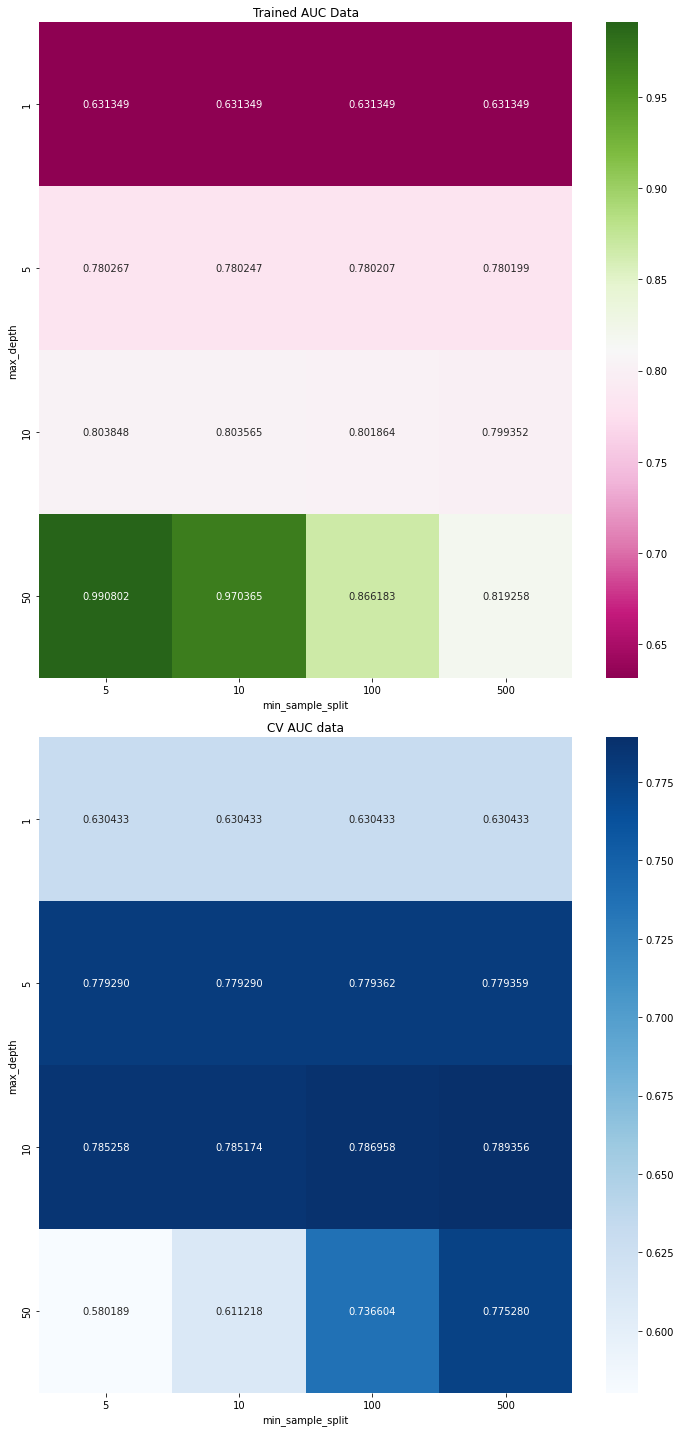

In [29]:
fig, axes = plt.subplots(nrows=2, figsize=(10,20))

# Train results
train_df = pd.DataFrame({'X': max_depth, 'Y': min_sample_split, 'Z': train_auc})
train_df_pivot = train_df.pivot("X", "Y", "Z")
axes[0] = sns.heatmap(train_df_pivot, annot=True, fmt="f", cmap='PiYG', ax=axes[0])
axes[0].set_xlabel('min_sample_split');
axes[0].set_ylabel('max_depth'); 
axes[0].set_title('Trained AUC Data', y=1);
axes[0].xaxis.set_ticklabels([5, 10, 100, 500]); 
axes[0].yaxis.set_ticklabels([1, 5, 10, 50]);

# Performing Cross Validation Results
cvr_df = pd.DataFrame({'X': max_depth, 'Y': min_sample_split, 'Z': cv_auc})
cvr_df_pivot = cvr_df.pivot("X", "Y", "Z")
axes[1] = sns.heatmap(cvr_df_pivot, annot=True, fmt="f", cmap='Blues', ax=axes[1])
axes[1].set_xlabel('min_sample_split');
axes[1].set_ylabel('max_depth'); 
axes[1].set_title('CV AUC data', y=1);
axes[1].xaxis.set_ticklabels([5, 10, 100, 500]); 
axes[1].yaxis.set_ticklabels([1, 5, 10, 50]);

plt.tight_layout()

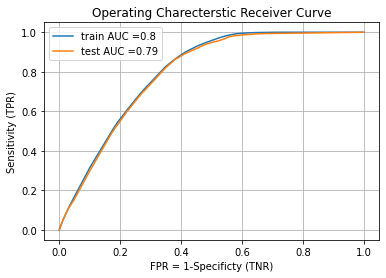

In [30]:
clf_best_DT = DecisionTreeClassifier(max_depth = best_max_depth, min_samples_split = best_min_sample,  class_weight = 'balanced')
clf_best_DT.fit(X_train_final, y_train)

y_train_prediction = clf_best_DT.predict_proba(X_train_final)[:,1]
y_test_prediction = clf_best_DT.predict_proba(X_test_final)[:,1]

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_prediction)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_prediction)

dt_auc = round(auc(test_fpr, test_tpr),2)

#Plotting the ROC curve 
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(round(auc(train_fpr, train_tpr),2)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(round(auc(test_fpr, test_tpr),2)))
plt.legend()
plt.xlabel("FPR = 1-Specificty (TNR)")
plt.ylabel("Sensitivity (TPR)")
plt.title("Operating Charecterstic Receiver Curve")
plt.grid()
plt.show()

In [31]:
def find_best_threshold(threshold, fpr, tpr):
    t_value = threshold[np.argmax(tpr*(1-fpr))]

    print("Maximum Value of TPR*(1-FPR)", max(tpr*(1-fpr)), "for threshold is:", np.round(t_value,3))
    print("="*100)
    return t_value

def predict_with_best_t(proba, threshold):
    prediction_list = []
    for i in proba:
        if i>=threshold:
            prediction_list.append(1)
        else:
            prediction_list.append(0)
    return prediction_list  

Maximum Value of TPR*(1-FPR) 0.5374817000659654 for threshold is: 0.563


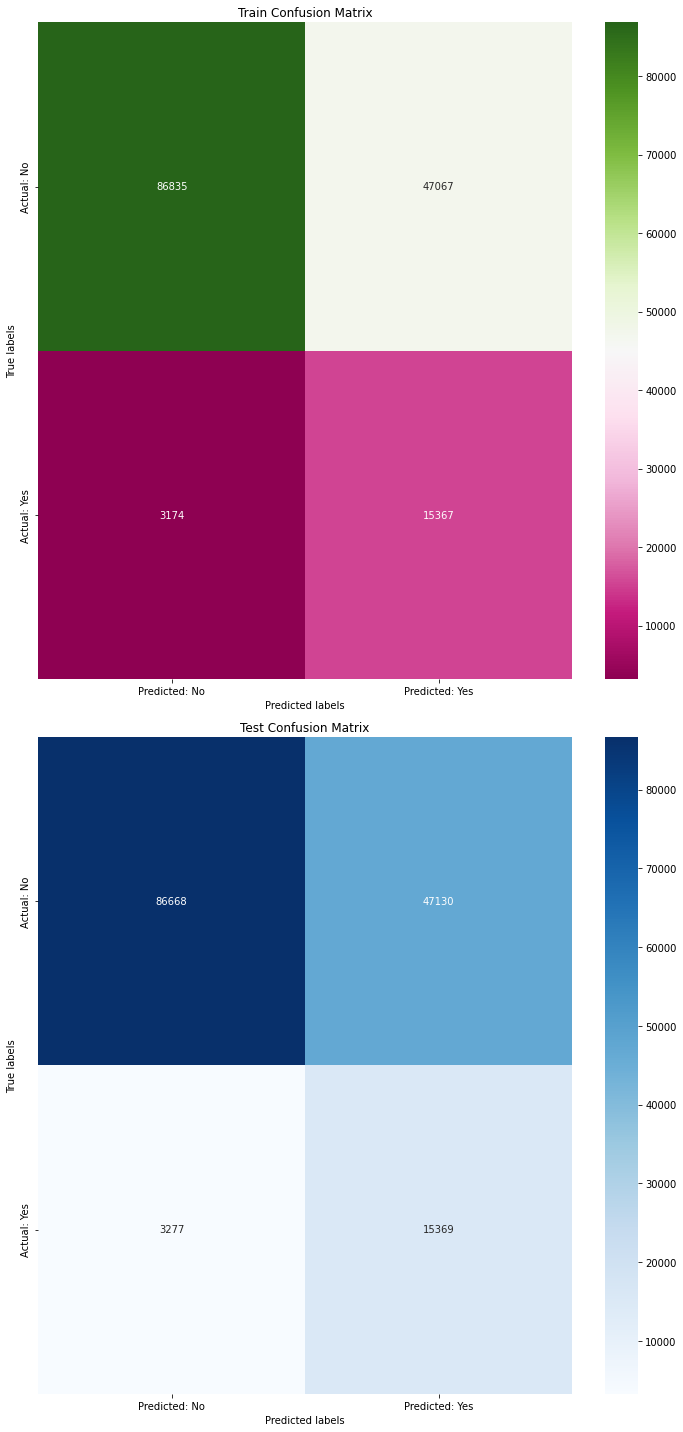

In [32]:
best_t_value = find_best_threshold(train_thresholds, train_fpr, train_tpr)

train_confusion_matrix = confusion_matrix(y_train, predict_with_best_t(y_train_prediction, best_t_value))
test_confusion_matrix = confusion_matrix(y_test, predict_with_best_t(y_test_prediction, best_t_value))

fig, axes = plt.subplots(nrows=2, figsize=(10,20))
plt.rcParams['figure.figsize']=(10,20)

sns.heatmap(train_confusion_matrix, annot=True, fmt="d", cmap='PiYG', ax=axes[0])
axes[0].set_xlabel('Predicted labels');
axes[0].set_ylabel('True labels'); 
axes[0].set_ylim(2.0, 0)
axes[0].set_title('Train Confusion Matrix');
axes[0].xaxis.set_ticklabels(['Predicted: No','Predicted: Yes']); 
axes[0].yaxis.set_ticklabels(['Actual: No','Actual: Yes']);

sns.heatmap(test_confusion_matrix, annot=True, fmt="d", cmap='Blues', ax=axes[1])
axes[1].set_xlabel('Predicted labels');axes[1].set_ylabel('True labels'); 
axes[1].set_ylim(2.0, 0)
axes[1].set_title('Test Confusion Matrix');
axes[1].xaxis.set_ticklabels(['Predicted: No','Predicted: Yes']); 
axes[1].yaxis.set_ticklabels(['Actual: No','Actual: Yes']);

plt.tight_layout()

In [33]:
DTresult = PrettyTable()
DTresult.field_names = ["Modem", "Hyper Parameter", "AUC"]
DTresult.add_row(["Decision Tree", str(best_max_depth)+'-'+str(best_min_sample), dt_auc])
print(DTresult)

+---------------+-----------------+------+
|     Modem     | Hyper Parameter | AUC  |
+---------------+-----------------+------+
| Decision Tree |      10-500     | 0.79 |
+---------------+-----------------+------+


LINEAR SVC

---

In [34]:
Linear = LinearSVC()
parameters = {'C': np.logspace(-10, 1, num=400, endpoint=True, base=10.0, dtype=None, axis=0)}
Linear_svm = RandomizedSearchCV(Linear, parameters, cv = None, scoring = "roc_auc", return_train_score = True)
Linear_svm.fit(X_train_final,y_train)

RandomizedSearchCV(estimator=LinearSVC(),
                   param_distributions={'C': array([1.00000000e-10, 1.06553795e-10, 1.13537112e-10, 1.20978102e-10,
       1.28906759e-10, 1.37355044e-10, 1.46357012e-10, 1.55948950e-10,
       1.66169525e-10, 1.77059935e-10, 1.88664080e-10, 2.01028738e-10,
       2.14203749e-10, 2.28242224e-10, 2.43200751e-10, 2.59139630e-10,
       2.76123110e-10, 2.94219653e-10, 3.13502...
       2.32228110e+00, 2.47447864e+00, 2.63665090e+00, 2.80945159e+00,
       2.99357729e+00, 3.18977022e+00, 3.39882122e+00, 3.62157300e+00,
       3.85892347e+00, 4.11182940e+00, 4.38131027e+00, 4.66845237e+00,
       4.97441317e+00, 5.30042602e+00, 5.64780507e+00, 6.01795064e+00,
       6.41235480e+00, 6.83260739e+00, 7.28040247e+00, 7.75754513e+00,
       8.26595874e+00, 8.80769273e+00, 9.38493086e+00, 1.00000000e+01])},
                   return_train_score=True, scoring='roc_auc')

In [35]:
results_svm = pd.DataFrame.from_dict(Linear_svm.cv_results_)
best_linear_c = (Linear_svm.best_params_)["C"]

results_svm = results_svm.sort_values(['param_C'])
results_svm.head()

print("The best hyperparameter value is: ", best_linear_c)

The best hyperparameter value is:  0.39263134017068396


In [36]:
base_SVM = LinearSVC(C = best_linear_c, class_weight='balanced') 
SVM_calibrated = CalibratedClassifierCV(base_estimator = base_SVM)
SVM_calibrated.fit(X_train_final, y_train)

CalibratedClassifierCV(base_estimator=LinearSVC(C=0.39263134017068396,
                                                class_weight='balanced'))

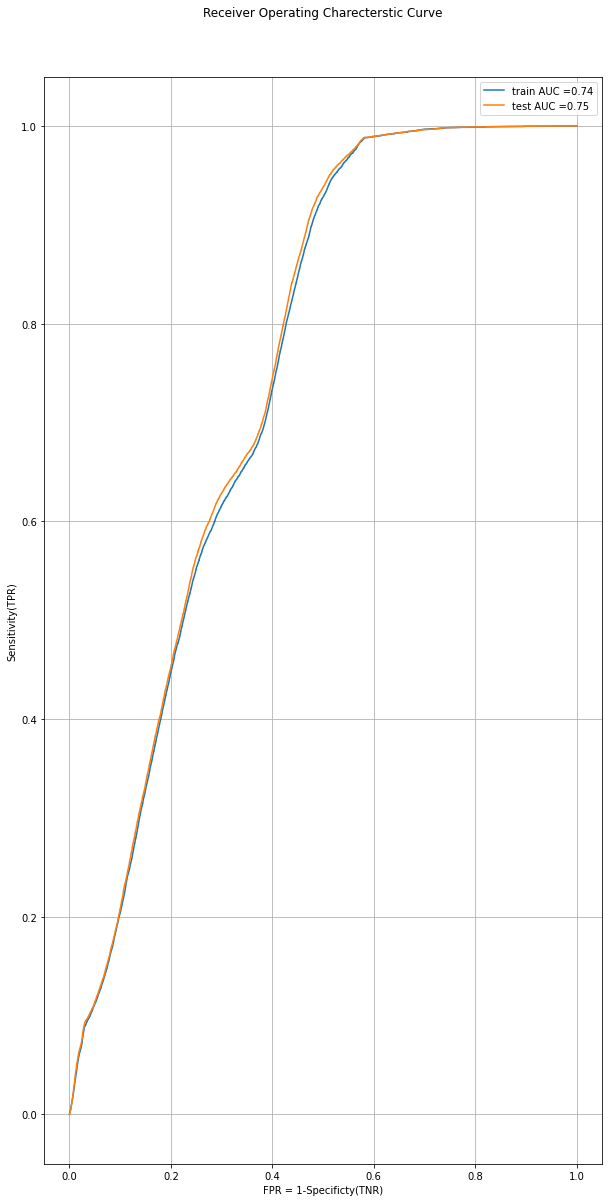

In [37]:
y_train_prediction = SVM_calibrated.predict_proba(X_train_final)[:,1]
y_test_prediction = SVM_calibrated.predict_proba(X_test_final)[:,1]
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_prediction)
test_fpr_svm, test_tpr_svm, te_thresholds_svm = roc_curve(y_test, y_test_prediction)
svm_auc = round(auc(test_fpr_svm, test_tpr_svm),2)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(round(auc(train_fpr, train_tpr),2)))
plt.plot(test_fpr_svm, test_tpr_svm, label="test AUC ="+str(round(auc(test_fpr_svm, test_tpr_svm),2)))
plt.legend()
plt.xlabel("FPR = 1-Specificty(TNR)")
plt.ylabel("Sensitivity(TPR)")
plt.title("Receiver Operating Charecterstic Curve", y=1.05)
plt.grid()
plt.show()

Maximum Value of TPR*(1-FPR) 0.47047183079735827 for threshold is: 0.16


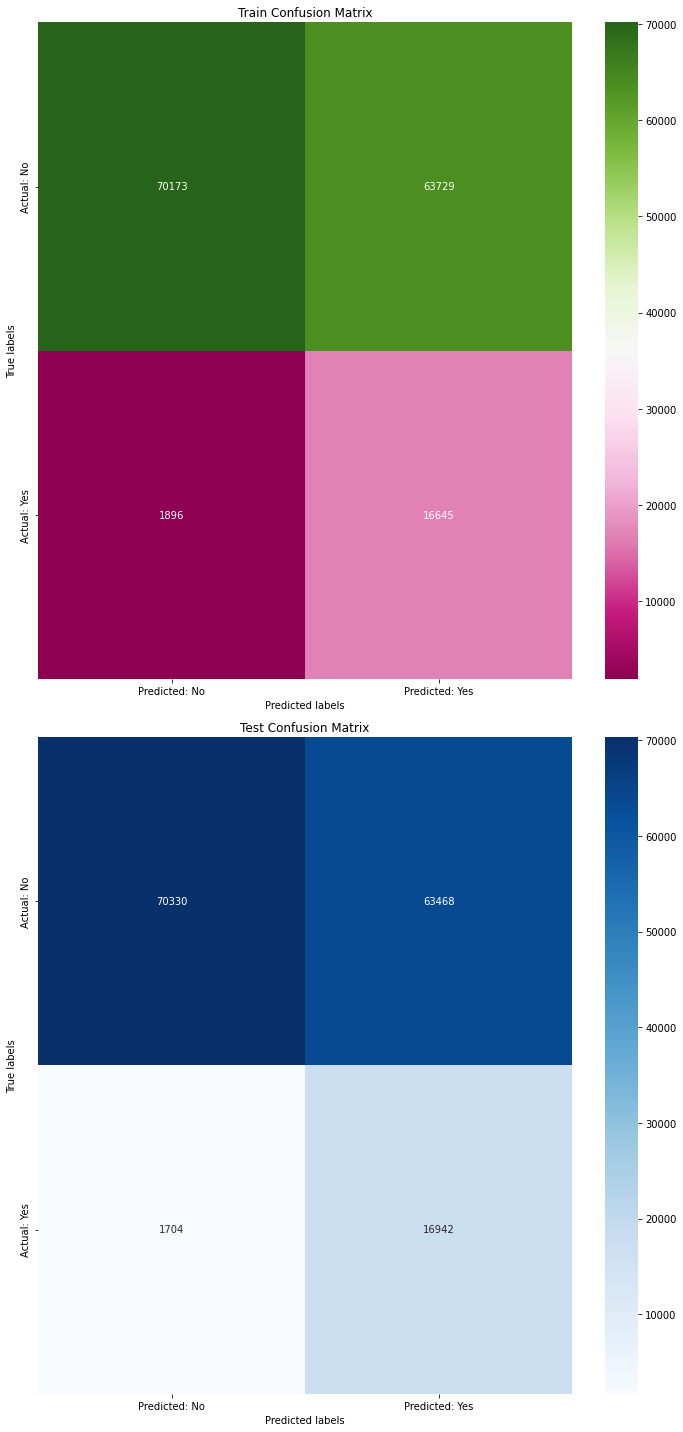

In [38]:
best_t_svm = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

train_confusion_matrix = confusion_matrix(y_train, predict_with_best_t(y_train_prediction, best_t_svm))
test_confusion_matrix = confusion_matrix(y_test, predict_with_best_t(y_test_prediction, best_t_svm))

fig, axes = plt.subplots(nrows=2, figsize=(10,20))
plt.rcParams['figure.figsize']=(7,7)

sns.heatmap(train_confusion_matrix, annot=True, fmt="d", cmap='PiYG', ax=axes[0])
axes[0].set_xlabel('Predicted labels');
axes[0].set_ylabel('True labels'); 
axes[0].set_ylim(2.0, 0)
axes[0].set_title('Train Confusion Matrix');
axes[0].xaxis.set_ticklabels(['Predicted: No','Predicted: Yes']); 
axes[0].yaxis.set_ticklabels(['Actual: No','Actual: Yes']);

sns.heatmap(test_confusion_matrix, annot=True, fmt="d", cmap='Blues', ax=axes[1])
axes[1].set_xlabel('Predicted labels');axes[1].set_ylabel('True labels'); 
axes[1].set_ylim(2.0, 0)
axes[1].set_title('Test Confusion Matrix');
axes[1].xaxis.set_ticklabels(['Predicted: No','Predicted: Yes']); 
axes[1].yaxis.set_ticklabels(['Actual: No','Actual: Yes']);

plt.tight_layout()

In [39]:
LSVCresult = PrettyTable()
LSVCresult.field_names = ["Model", "Hyper Parameter", "AUC"]
LSVCresult.add_row(["LinearSVC", round(best_linear_c,3), svm_auc])
print(LSVCresult)

+-----------+-----------------+------+
|   Model   | Hyper Parameter | AUC  |
+-----------+-----------------+------+
| LinearSVC |      0.393      | 0.75 |
+-----------+-----------------+------+


GradientBoostingClassifier

---

In [40]:
GBC = GradientBoostingClassifier()
parameters = {'n_estimators': [1, 10, 50, 100], 'learning_rate':  [0.2, 0.4, 0.6, 0.8]}
GBC_svm = RandomizedSearchCV(GBC, parameters, cv=None, scoring='roc_auc', return_train_score=True)
GBC_svm.fit(X_train_final, y_train)

results = pd.DataFrame.from_dict(GBC_svm.cv_results_)
results.sort_values('rank_test_score')[0:3]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
3,1.602972,0.029905,0.017870,0.001467,10,0.6,"{'n_estimators': 10, 'learning_rate': 0.6}",0.795363,0.791672,0.790144,...,0.793364,0.002149,1,0.794489,0.795418,0.795956,0.795255,0.794506,0.795125,0.000562
9,18.233064,0.793749,0.054627,0.003124,100,0.2,"{'n_estimators': 100, 'learning_rate': 0.2}",0.794958,0.791719,0.789643,...,0.793060,0.002213,2,0.801497,0.802417,0.802560,0.801527,0.802748,0.802150,0.000531
8,8.426639,0.118304,0.029293,0.001238,50,0.6,"{'n_estimators': 50, 'learning_rate': 0.6}",0.793527,0.790444,0.788523,...,0.791299,0.001926,3,0.802522,0.804680,0.804430,0.803696,0.803179,0.803701,0.000794


In [41]:
train_auc= results['mean_train_score']
cv_auc = results['mean_test_score'] 
num_estimators = results['param_n_estimators']
learning_rate = results['param_learning_rate']
best_estimators = GBC_svm.best_params_['n_estimators']
best_learning_rate = GBC_svm.best_params_['learning_rate']

print("The best value for n_estimators of the model is: ", best_estimators)
print("The best value for learning rate of the model is: ", best_learning_rate)

The best value for n_estimators of the model is:  10
The best value for learning rate of the model is:  0.6


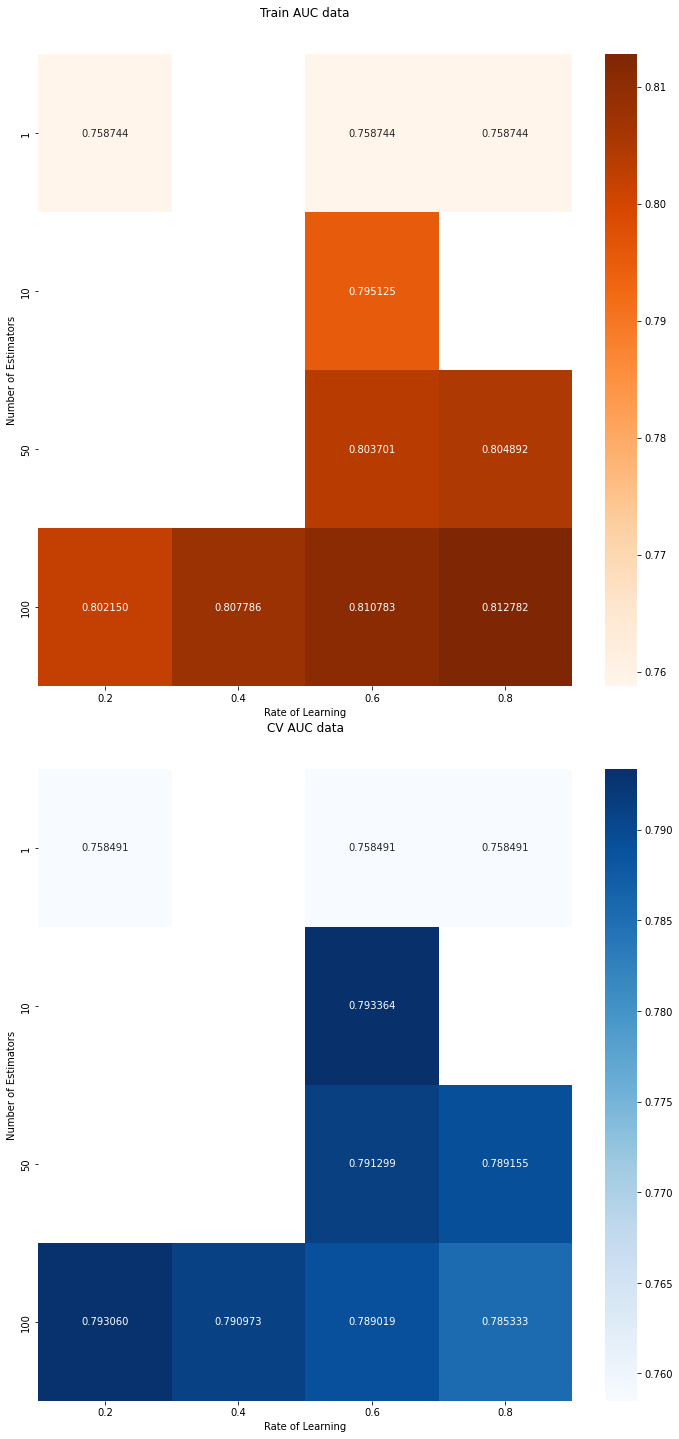

In [42]:
fig, axis = plt.subplots(nrows=2, figsize=(10,20))
plt.rcParams['figure.figsize']=(7,7)

#For Train results
data = pd.DataFrame({'X': num_estimators, 'Y': learning_rate, 'Z': train_auc})
data_pivoted = data.pivot("X", "Y", "Z")
axis[0] = sns.heatmap(data_pivoted, annot=True, fmt="f", cmap='Oranges', ax=axis[0])
axis[0].set_xlabel('Rate of Learning');
axis[0].set_ylabel('Number of Estimators'); 
axis[0].set_title('Train AUC data', y=1.05);

#For Cross validation results
data = pd.DataFrame({'X': num_estimators, 'Y': learning_rate, 'Z': cv_auc})
data_pivoted = data.pivot("X", "Y", "Z")
axis[1] = sns.heatmap(data_pivoted, annot=True, fmt="f", cmap='Blues', ax=axis[1])
axis[1].set_xlabel('Rate of Learning');
axis[1].set_ylabel('Number of Estimators'); 
axis[1].set_title('CV AUC data', y=1.05);

plt.tight_layout()

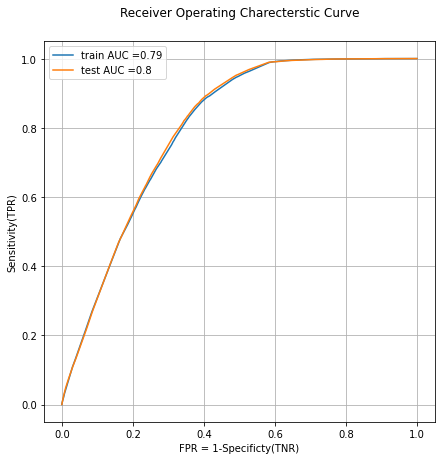

In [43]:
best_gbdt = GradientBoostingClassifier(n_estimators = best_estimators, learning_rate = best_learning_rate)
best_gbdt.fit(X_train_final, y_train)

#Checking the performance of the model on test data using AUC as our metric
y_train_prediction = best_gbdt.predict_proba(X_train_final)[:,1]
y_test_prediction = best_gbdt.predict_proba(X_test_final)[:,1]
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_prediction)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_prediction)
gbdt_auc = round(auc(test_fpr, test_tpr),2)

#Plotting the ROC curve 
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(round(auc(train_fpr, train_tpr),2)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(round(auc(test_fpr, test_tpr),2)))
plt.legend()
plt.xlabel("FPR = 1-Specificty(TNR)")
plt.ylabel("Sensitivity(TPR)")
plt.title("Receiver Operating Charecterstic Curve", y=1.05)
plt.grid()
plt.show()

Maximum Value of TPR*(1-FPR) 0.5338656823298328 for threshold is: 0.159


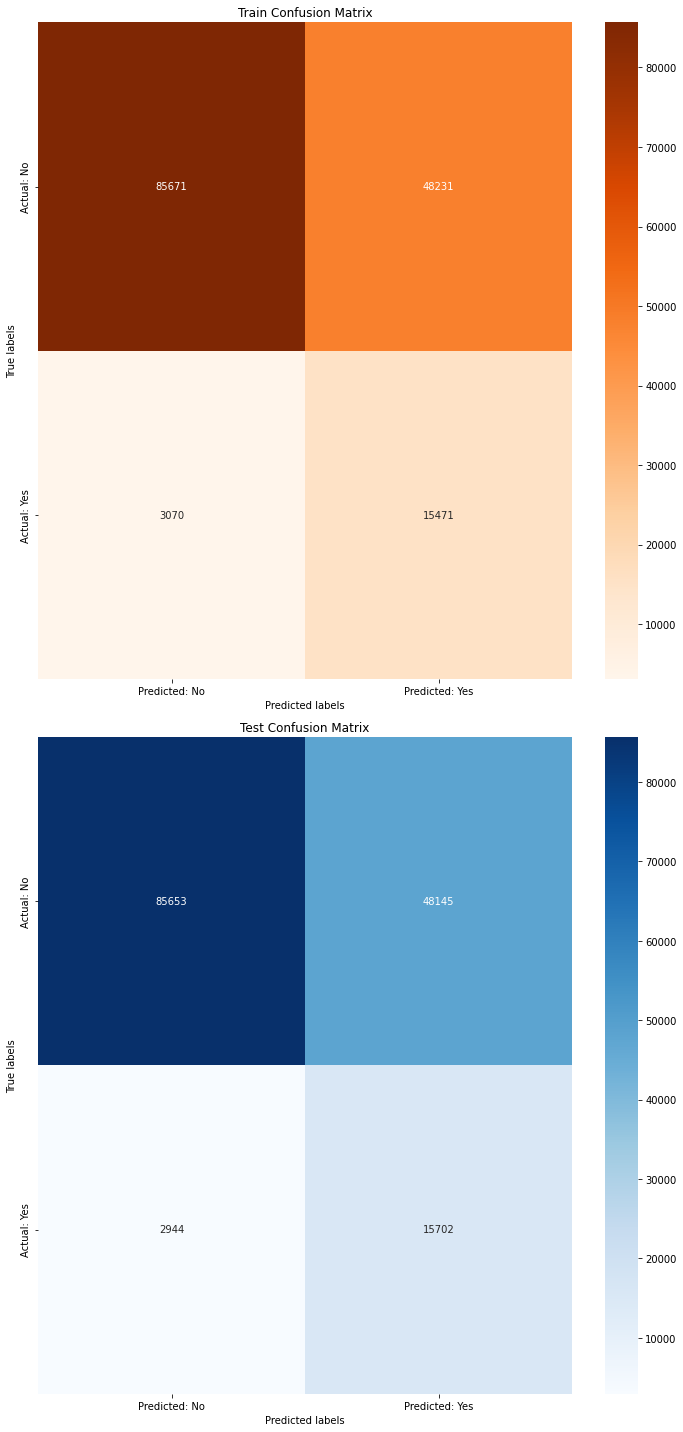

In [44]:
best_t_gbdt = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

train_confusion_matrix = confusion_matrix(y_train, predict_with_best_t(y_train_prediction, best_t_gbdt))
test_confusion_matrix = confusion_matrix(y_test, predict_with_best_t(y_test_prediction, best_t_gbdt))

fig, axes = plt.subplots(nrows=2, figsize=(10,20))

sns.heatmap(train_confusion_matrix, annot=True, fmt="d", cmap='Oranges', ax=axes[0])
axes[0].set_xlabel('Predicted labels');
axes[0].set_ylabel('True labels'); 
axes[0].set_ylim(2.0, 0)
axes[0].set_title('Train Confusion Matrix');
axes[0].xaxis.set_ticklabels(['Predicted: No','Predicted: Yes']); 
axes[0].yaxis.set_ticklabels(['Actual: No','Actual: Yes']);

sns.heatmap(test_confusion_matrix, annot=True, fmt="d", cmap='Blues', ax=axes[1])
axes[1].set_xlabel('Predicted labels');axes[1].set_ylabel('True labels'); 
axes[1].set_ylim(2.0, 0)
axes[1].set_title('Test Confusion Matrix');
axes[1].xaxis.set_ticklabels(['Predicted: No','Predicted: Yes']); 
axes[1].yaxis.set_ticklabels(['Actual: No','Actual: Yes']);

plt.tight_layout()

In [45]:
GBCresult = PrettyTable()
GBCresult.field_names = ["Model", "Hyper Parameter", "AUC"]
GBCresult.add_row(["GradientBoostingClassifier", str(best_estimators)+'-'+str(best_learning_rate), gbdt_auc])
print(GBCresult)
     

+----------------------------+-----------------+-----+
|           Model            | Hyper Parameter | AUC |
+----------------------------+-----------------+-----+
| GradientBoostingClassifier |      10-0.6     | 0.8 |
+----------------------------+-----------------+-----+


## Results

---

In [46]:
FinalResult = PrettyTable()
FinalResult.field_names = ["Model", "Hyper Parameter", "AUC"]
FinalResult.add_row(["Decision Tree", str(best_max_depth)+'-'+str(best_min_sample), dt_auc])
FinalResult.add_row(["LinearSVC", round(best_linear_c,3), svm_auc])
FinalResult.add_row(["GradientBoostingClassifier", str(best_estimators)+'-'+str(best_learning_rate), gbdt_auc])
print(FinalResult)
     

+----------------------------+-----------------+------+
|           Model            | Hyper Parameter | AUC  |
+----------------------------+-----------------+------+
|       Decision Tree        |      10-500     | 0.79 |
|         LinearSVC          |      0.393      | 0.75 |
| GradientBoostingClassifier |      10-0.6     | 0.8  |
+----------------------------+-----------------+------+
